**Importing all required libraries**

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

**Importing the dataset**

scikit-learn comes with several test datasets that are useful for testing many problems of data analysis and prediction of the results. Let's load the handwritten digits dataset.

In [ ]:
df = datasets.load_digits()


**Exploring digit dataset**

dir() is a powerful inbuilt function in Python3, which returns list of the attributes and methods of any object

In [ ]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Lets read datatest description. We get more information related to our dataset by using DESCR method of dataset.

In [ ]:
print(df['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**Analyzing the dataset**

The images of the handwritten digits are contained in a df.images array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels.

In [ ]:
#examining image data
print(df.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [ ]:
# Dimension of original image data
print(df.images.shape)

(1797, 8, 8)


Now let's investigate the target attribute. The numerical values represented by images, i.e., the targets, are contained in the df.targets array. It is a 1-dimensional array 

In [ ]:
#Examinig the labels
print(df.target)

[0 1 2 ... 8 9 8]


In [ ]:
print(df.target.shape)

(1797,)


We have 1797 labels for our target that contains values from 0 to 9.

Each image is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white, with a value of 0, to black, with the value 15. let's look at the data of the 576th 8x8 image.

[[ 0.  0.  4. 12. 16. 14.  7.  0.]
 [ 0.  2. 16.  6.  0.  7. 12.  0.]
 [ 0.  0.  7.  0.  3. 13.  3.  0.]
 [ 0.  0.  0.  1. 16.  6.  0.  0.]
 [ 0.  0.  0.  0.  9. 12.  0.  0.]
 [ 0.  0.  2.  0.  0. 13.  5.  0.]
 [ 0.  3. 16.  7.  1. 12.  4.  0.]
 [ 0.  0.  3. 12. 16. 15.  2.  0.]]


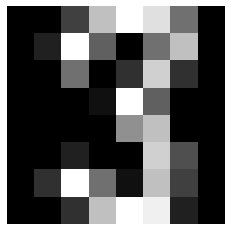

In [ ]:
#visualizing random image in the dataset

#matrix representation of an image
print(df.images[576])

#visual representation of an image
plt.imshow(df.images[576])
plt.gray()
plt.axis('off')
plt.show()

We got the grayscale image of one of the 1,797 handwritten digits.

The image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits.


**Visualization of digits**

As discussed, the images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 10 images

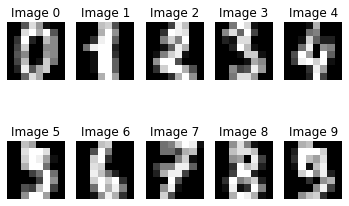

In [ ]:
#visualing some images and labels in the dataset
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(df.images[i])
  plt.axis('off')
  plt.title('Image ' + str(df.target[i]))
plt.show()

Our next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels. let's define X and y. The inputs are 8x8 grayscale images. To apply a classifier, it requires a 1-dimensional array in input, but our images are 2D. So we need to flatten all images



In [ ]:
X = np.reshape(df.images,(1797,64))
y = df.target

In [ ]:
# Dimension of reshaped data
print(X.shape)

(1797, 64)


We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension of shape (64,)

**Data splitting**

Splitting our Dataset into training and testing sets.

Here, we are using 75% of data in datasets for training our model and rest 25% for testing our model.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Defining the model**

now, we will use the support vector classification for the prediction purpose. we create an estimator of SVC type and then choose an initial setting, assigning the values C and gamma generic values.

In [ ]:
svc = svm.SVC(gamma=0.001,C=100)

once we have defined a predictive model, we must instruct it with a training set

**Training the model**

Now we can train the svc estimator that we have defined earlier on the training data.

In [ ]:
svc.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

**Test the model**

we can test our estimator by making it interpret the digits of the test set using predict() function.

In [ ]:
y_pred = svc.predict(X_test)

**Evaluation of model performance**

*Confusion matrix* :

We can plot a confusion matrix of the true digit values and the predicted digit values. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

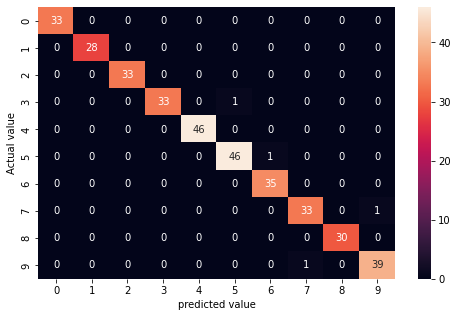

In [ ]:
cm  = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted value")
plt.ylabel("Actual value")
plt.show()

*Checking score (Find Accuracy)* :

We can compute the accuracy of the classifier, which the probability for a digit to be classified in the right category. Again, scikit-learn comes with a handy tool to do that:

In [ ]:
MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error: ",MAE)

score = svc.score(X_test,y_test)
print("score: ",score)

Mean Absolute Error:  0.019444444444444445
score:  0.9888888888888889


***Conclusion***

Our model has an accuracy of around 98% which is quite good. We can see that the svc estimator has learned correctly. It is able to recognize the handwritten digits. Hence can say that so the NULL hypothesis provided in the problem statement holds True.